In [77]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
rcParams['figure.figsize'] = 15, 6

In [27]:
df=pd.read_csv("/content/MonthWiseMarketArrivals_Clean.csv")

In [28]:
df

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012
...,...,...,...,...,...,...,...,...,...,...
10222,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,December-2011
10223,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,December-2012
10224,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,December-2013
10225,YEOLA(MS),December,2014,201077,446,1654,1456,MS,YEOLA,December-2014


In [29]:
df.corr()

,year,quantity,priceMin,priceMax,priceMod
year,1.000000,0.018351,0.445536,0.548071,0.533262
quantity,0.018351,1.000000,-0.106708,-0.022406,-0.056827
priceMin,0.445536,-0.106708,1.000000,0.781736,0.883396
priceMax,0.548071,-0.022406,0.781736,1.000000,0.968069
priceMod,0.533262,-0.056827,0.883396,0.968069,1.000000


In [30]:
df.shape

(10227, 10)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


In [32]:
df.isna().sum()

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64

In [33]:
df.columns

Index(['market', 'month', 'year', 'quantity', 'priceMin', 'priceMax',
       'priceMod', 'state', 'city', 'date'],
      dtype='object')

In [34]:
df.city.unique()

array(['ABOHAR', 'AGRA', 'AHMEDABAD', 'AHMEDNAGAR', 'AJMER', 'ALIGARH',
       'ALWAR', 'AMRITSAR', 'BALLIA', 'BANGALORE', 'BAREILLY', 'BELGAUM',
       'BHATINDA', 'BHAVNAGAR', 'BHOPAL', 'BHUBNESWER', 'BIHARSHARIF',
       'BIJAPUR', 'BIKANER', 'BOMBORI', 'BURDWAN', 'CHAKAN', 'CHALLAKERE',
       'CHANDIGARH', 'CHANDVAD', 'CHENNAI', 'CHICKBALLAPUR', 'COIMBATORE',
       'DEESA', 'DEHRADOON', 'DELHI', 'DEORIA', 'DEVALA', 'DEWAS',
       'DHAVANGERE', 'DHULIA', 'DINDIGUL', 'DINDORI', 'ETAWAH', 'GONDAL',
       'GORAKHPUR', 'GUWAHATI', 'HALDWANI', 'HASSAN', 'HOSHIARPUR',
       'HUBLI', 'HYDERABAD', 'INDORE', 'JAIPUR', 'JALANDHAR', 'JALGAON',
       'JAMMU', 'JAMNAGAR', 'JODHPUR', 'JUNNAR', 'KALVAN', 'KANPUR',
       'KARNAL', 'KHANNA', 'KOLAR', 'KOLHAPUR', 'KOLKATA', 'KOPERGAON',
       'KOTA', 'KURNOOL', 'LASALGAON', 'LONAND', 'LUCKNOW', 'LUDHIANA',
       'MADURAI', 'MAHUVA', 'MALEGAON', 'MANDSOUR', 'MANMAD', 'MEERUT',
       'MIDNAPUR', 'MUMBAI', 'NAGPUR', 'NANDGAON', 'NASIK', 'NEEMU

In [35]:
df['date']=pd.to_datetime(df['date'])
df.set_index(['date'],inplace=True)

In [36]:
df.index

DatetimeIndex(['2005-01-01', '2006-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2005-02-01', '2006-02-01',
               ...
               '2006-12-01', '2007-12-01', '2008-12-01', '2009-12-01',
               '2010-12-01', '2011-12-01', '2012-12-01', '2013-12-01',
               '2014-12-01', '2015-12-01'],
              dtype='datetime64[ns]', name='date', length=10227, freq=None)

In [38]:
df2 = df.T.drop_duplicates().T
print(df2)

                market     month  year quantity priceMin priceMax priceMod  \
date                                                                         
2005-01-01  ABOHAR(PB)   January  2005     2350      404      493      446   
2006-01-01  ABOHAR(PB)   January  2006      900      487      638      563   
2010-01-01  ABOHAR(PB)   January  2010      790     1283     1592     1460   
2011-01-01  ABOHAR(PB)   January  2011      245     3067     3750     3433   
2012-01-01  ABOHAR(PB)   January  2012     1035      523      686      605   
...                ...       ...   ...      ...      ...      ...      ...   
2011-12-01   YEOLA(MS)  December  2011   131326      282      612      526   
2012-12-01   YEOLA(MS)  December  2012   207066      485     1327     1136   
2013-12-01   YEOLA(MS)  December  2013   215883      472     1427     1177   
2014-12-01   YEOLA(MS)  December  2014   201077      446     1654     1456   
2015-12-01   YEOLA(MS)  December  2015   223315      609     144

In [39]:
df2.shape

(10227, 9)

In [40]:
df2.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
2005-01-01,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR
2006-01-01,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR
2010-01-01,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR
2011-01-01,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR
2012-01-01,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR


In [89]:
df=df[df['market']=='MUMBAI']

In [90]:
df

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
2004-01-01,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI
2005-01-01,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI
2006-01-01,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI
2007-01-01,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI
2008-01-01,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI
...,...,...,...,...,...,...,...,...,...
2011-12-01,MUMBAI,December,2011,290350,519,994,749,MS,MUMBAI
2012-12-01,MUMBAI,December,2012,218500,1048,1609,1330,MS,MUMBAI
2013-12-01,MUMBAI,December,2013,226385,1298,1976,1639,MS,MUMBAI


In [55]:
from statsmodels.tsa.arima_model import ARIMA

In [91]:
ts = df['priceMod']
ts

date
2004-01-01     849
2005-01-01     387
2006-01-01     402
2007-01-01     997
2008-01-01     448
              ... 
2011-12-01     749
2012-12-01    1330
2013-12-01    1639
2014-12-01    1802
2015-12-01    1542
Name: priceMod, Length: 146, dtype: int64

In [78]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    rolmean=timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

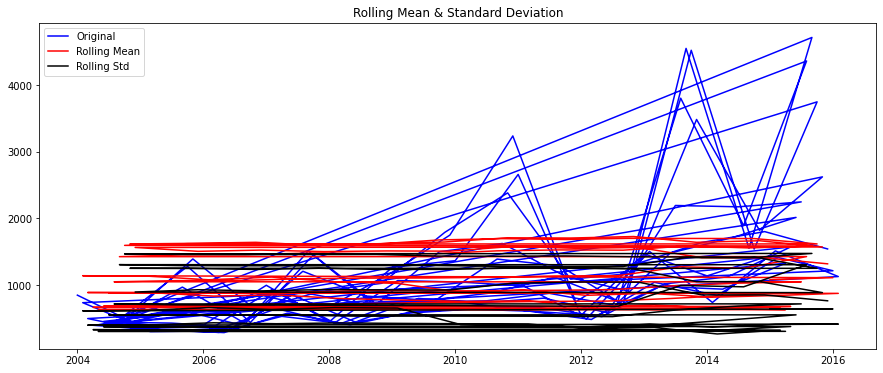

Results of Dickey-Fuller Test:
Test Statistic                  -0.818907
p-value                          0.813505
#Lags Used                      13.000000
Number of Observations Used    132.000000
Critical Value (1%)             -3.480888
Critical Value (5%)             -2.883697
Critical Value (10%)            -2.578586
dtype: float64


In [79]:
test_stationarity(ts)

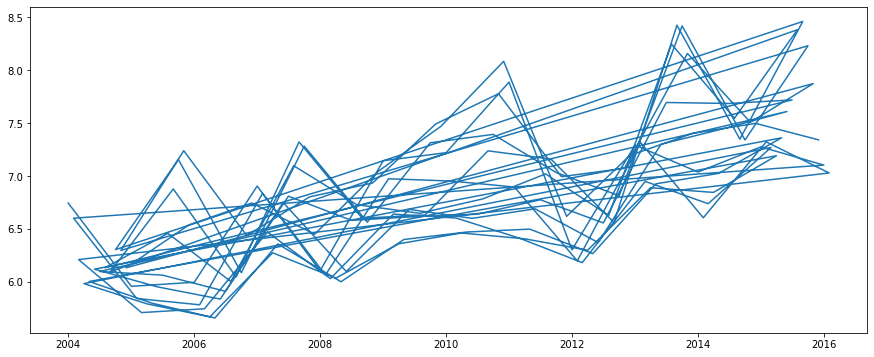

In [93]:
ts_log = np.log(ts)
plt.plot(ts_log)

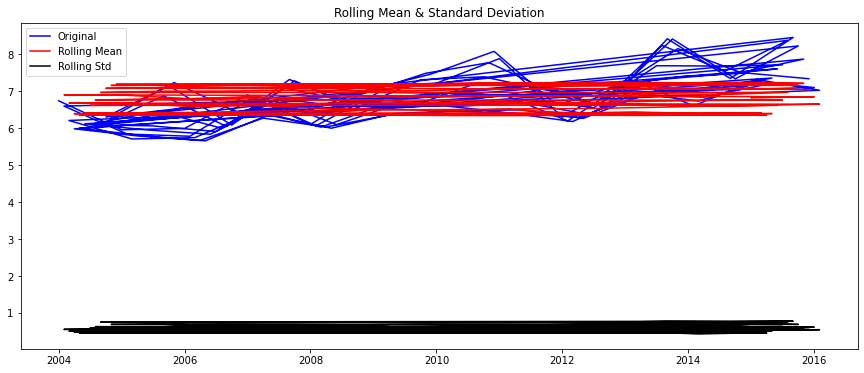

Results of Dickey-Fuller Test:
Test Statistic                  -0.469812
p-value                          0.897774
#Lags Used                      13.000000
Number of Observations Used    132.000000
Critical Value (1%)             -3.480888
Critical Value (5%)             -2.883697
Critical Value (10%)            -2.578586
dtype: float64


In [94]:
test_stationarity(ts_log)

In [95]:
moving_avg=ts_log.rolling(12).mean()
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff[7:15]

date
2011-01-01         NaN
2012-01-01         NaN
2013-01-01         NaN
2014-01-01         NaN
2015-01-01    0.452513
2016-01-01    0.250662
2004-02-01   -0.304174
2005-02-01   -1.049117
Name: priceMod, dtype: float64

In [96]:
#dropping NAs
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

date
2015-01-01    0.452513
2016-01-01    0.250662
2004-02-01   -0.304174
2005-02-01   -1.049117
2006-02-01   -1.015426
Name: priceMod, dtype: float64

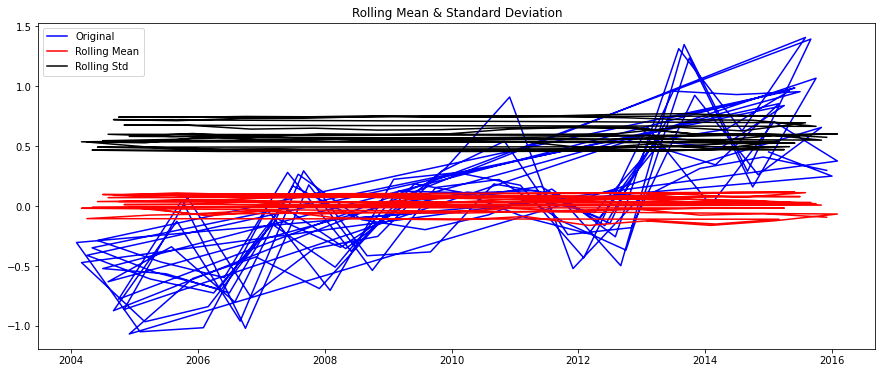

Results of Dickey-Fuller Test:
Test Statistic                  -2.053453
p-value                          0.263638
#Lags Used                      13.000000
Number of Observations Used    121.000000
Critical Value (1%)             -3.485585
Critical Value (5%)             -2.885739
Critical Value (10%)            -2.579676
dtype: float64


In [97]:
test_stationarity(ts_log_moving_avg_diff)

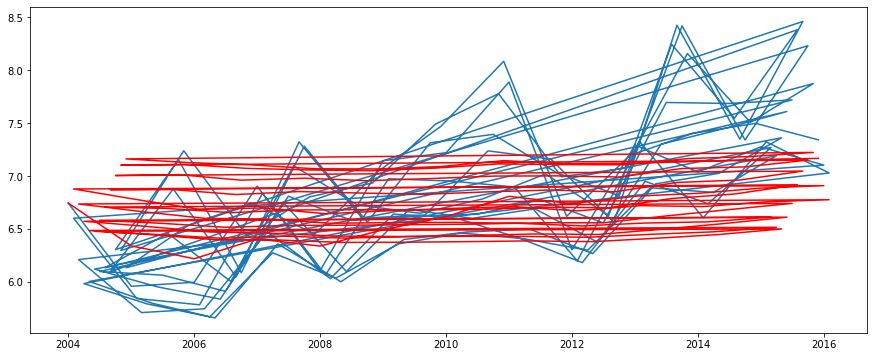

In [98]:
expwighted_avg =ts_log.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
# expwighted_avg.plot(style='k--')

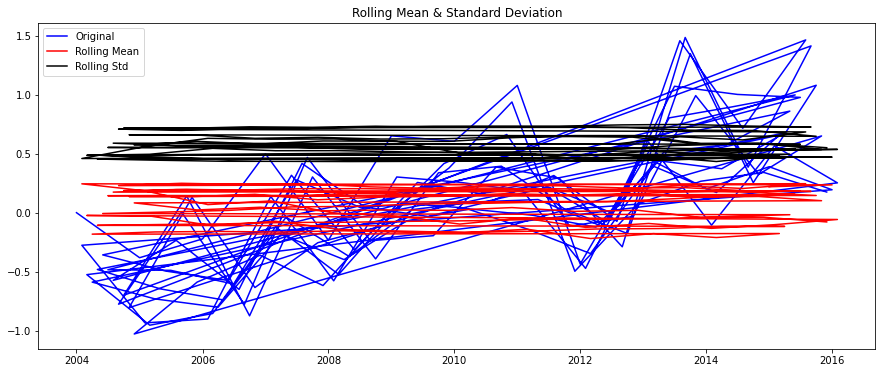

Results of Dickey-Fuller Test:
Test Statistic                  -1.542964
p-value                          0.512161
#Lags Used                      13.000000
Number of Observations Used    132.000000
Critical Value (1%)             -3.480888
Critical Value (5%)             -2.883697
Critical Value (10%)            -2.578586
dtype: float64


In [99]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

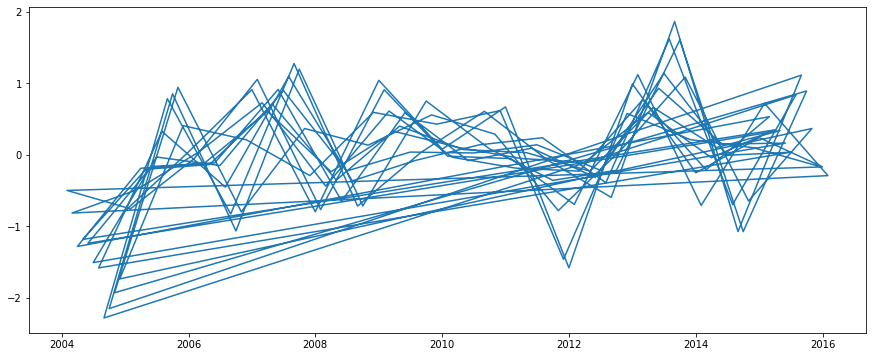

In [100]:
#Take first difference:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

#ARIMA Auto regressive + Integration + Moving Average 

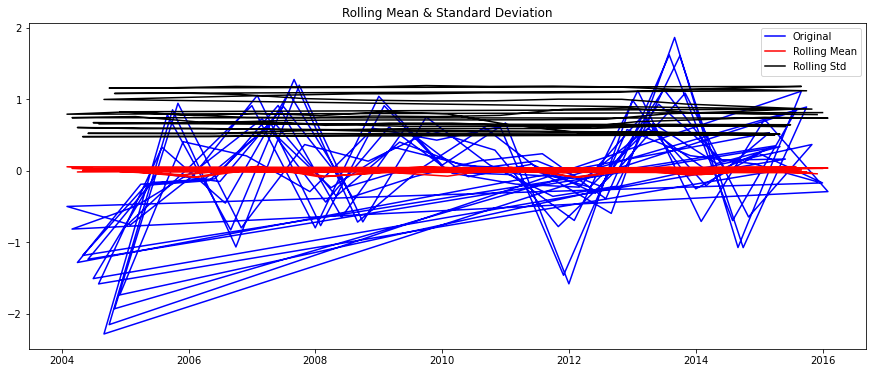

Results of Dickey-Fuller Test:
Test Statistic                  -3.035791
p-value                          0.031685
#Lags Used                      14.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [101]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [102]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

ValueError: ignored